<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризация DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

## Введение

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, основанный на концепции плотности. Он эффективно работает с данными произвольной формы и может обрабатывать шумовые точки. В данной лекции мы рассмотрим все ключевые аспекты алгоритма с подробными формулами.



## 1. Основные понятия

### 1.1 Пространство и расстояние

DBSCAN работает в метрическом пространстве, где каждая точка данных представлена координатами в $ n $-мерном пространстве. Между любыми двумя точками можно вычислить расстояние. Наиболее часто используется **евклидово расстояние**:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

где $ x = (x_1, x_2, \dots, x_n) $ и $ y = (y_1, y_2, \dots, y_n) $ — точки в $ n $-мерном пространстве.

Другие метрики, такие как манхэттенское расстояние или расстояние Чебышёва, также могут использоваться в зависимости от задачи.




### 1.2 Плотность и окрестность

#### a) $\varepsilon$-окрестность
$\varepsilon$-окрестность точки $ p $ — это множество всех точек, находящихся на расстоянии не более $\varepsilon$ от точки $ p $. Формально:
$$
N_\varepsilon(p) = \{q \in D : d(p, q) \leq \varepsilon\}
$$
где:
- $ D $ — множество всех точек данных,
- $ d(p, q) $ — расстояние между точками $ p $ и $ q $.

**Что это значит?**
Эта формула описывает, какие точки считаются "близкими" к точке $ p $. Если расстояние между точкой $ p $ и другой точкой $ q $ не превышает заданного порога $\varepsilon$, то точка $ q $ входит в $\varepsilon$-окрестность точки $ p $.



#### b) Минимальное количество точек ($ MinPts $)
$ MinPts $ — это минимальное количество точек, которое должно быть в $\varepsilon$-окрестности точки, чтобы она считалась "плотной". Это параметр алгоритма.

**Что это значит?**
Если в $\varepsilon$-окрестности точки $ p $ есть хотя бы $ MinPts $ точек (включая саму точку $ p $), то эта точка считается "плотной". Иначе точка считается "разреженной".



### Числовой пример

Предположим, что у нас есть следующее множество точек $ D $ в двумерном пространстве:

$$
D = \{(0, 0), (1, 1), (2, 2), (3, 3), (5, 5), (6, 6)\}.
$$

Мы выбрали параметры:
- $\varepsilon = 2$,
- $ MinPts = 3 $.

Используем евклидово расстояние:
$$
d(p, q) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}.
$$

#### Шаг 1: Найдем $\varepsilon$-окрестность для каждой точки

1. **Точка $ (0, 0) $:**
   - Расчет расстояний до других точек:
     - До $ (1, 1) $: $ d((0, 0), (1, 1)) = \sqrt{(1-0)^2 + (1-0)^2} = \sqrt{2} \approx 1.41 $ (меньше $\varepsilon = 2$).
     - До $ (2, 2) $: $ d((0, 0), (2, 2)) = \sqrt{(2-0)^2 + (2-0)^2} = \sqrt{8} \approx 2.83 $ (больше $\varepsilon = 2$).
     - Остальные точки дальше.
   - $\varepsilon$-окрестность: $ N_\varepsilon((0, 0)) = \{(0, 0), (1, 1)\} $.

2. **Точка $ (1, 1) $:**
   - Расчет расстояний до других точек:
     - До $ (0, 0) $: $ d((1, 1), (0, 0)) = \sqrt{2} \approx 1.41 $ (меньше $\varepsilon = 2$).
     - До $ (2, 2) $: $ d((1, 1), (2, 2)) = \sqrt{2} \approx 1.41 $ (меньше $\varepsilon = 2$).
     - До $ (3, 3) $: $ d((1, 1), (3, 3)) = \sqrt{8} \approx 2.83 $ (больше $\varepsilon = 2$).
     - Остальные точки дальше.
   - $\varepsilon$-окрестность: $ N_\varepsilon((1, 1)) = \{(1, 1), (0, 0), (2, 2)\} $.

3. **Точка $ (2, 2) $:**
   - Расчет расстояний до других точек:
     - До $ (1, 1) $: $ d((2, 2), (1, 1)) = \sqrt{2} \approx 1.41 $ (меньше $\varepsilon = 2$).
     - До $ (3, 3) $: $ d((2, 2), (3, 3)) = \sqrt{2} \approx 1.41 $ (меньше $\varepsilon = 2$).
     - До $ (0, 0) $: $ d((2, 2), (0, 0)) = \sqrt{8} \approx 2.83 $ (больше $\varepsilon = 2$).
     - Остальные точки дальше.
   - $\varepsilon$-окрестность: $ N_\varepsilon((2, 2)) = \{(2, 2), (1, 1), (3, 3)\} $.

4. **Точка $ (3, 3) $:**
   - Расчет расстояний до других точек:
     - До $ (2, 2) $: $ d((3, 3), (2, 2)) = \sqrt{2} \approx 1.41 $ (меньше $\varepsilon = 2$).
     - До $ (5, 5) $: $ d((3, 3), (5, 5)) = \sqrt{8} \approx 2.83 $ (больше $\varepsilon = 2$).
     - Остальные точки дальше.
   - $\varepsilon$-окрестность: $ N_\varepsilon((3, 3)) = \{(3, 3), (2, 2)\} $.

5. **Точка $ (5, 5) $:**
   - Расчет расстояний до других точек:
     - До $ (6, 6) $: $ d((5, 5), (6, 6)) = \sqrt{2} \approx 1.41 $ (меньше $\varepsilon = 2$).
     - До $ (3, 3) $: $ d((5, 5), (3, 3)) = \sqrt{8} \approx 2.83 $ (больше $\varepsilon = 2$).
     - Остальные точки дальше.
   - $\varepsilon$-окрестность: $ N_\varepsilon((5, 5)) = \{(5, 5), (6, 6)\} $.

6. **Точка $ (6, 6) $:**
   - Расчет расстояний до других точек:
     - До $ (5, 5) $: $ d((6, 6), (5, 5)) = \sqrt{2} \approx 1.41 $ (меньше $\varepsilon = 2$).
     - Остальные точки дальше.
   - $\varepsilon$-окрестность: $ N_\varepsilon((6, 6)) = \{(6, 6), (5, 5)\} $.



#### Шаг 2: Проверяем плотность

Теперь проверим, какие точки являются "плотными" (содержат хотя бы $ MinPts = 3 $ точек в своей $\varepsilon$-окрестности):

- Точка $ (0, 0) $: $ |N_\varepsilon((0, 0))| = 2 $ (не плотная).
- Точка $ (1, 1) $: $ |N_\varepsilon((1, 1))| = 3 $ (**плотная**).
- Точка $ (2, 2) $: $ |N_\varepsilon((2, 2))| = 3 $ (**плотная**).
- Точка $ (3, 3) $: $ |N_\varepsilon((3, 3))| = 2 $ (не плотная).
- Точка $ (5, 5) $: $ |N_\varepsilon((5, 5))| = 2 $ (не плотная).
- Точка $ (6, 6) $: $ |N_\varepsilon((6, 6))| = 2 $ (не плотная).



### Вывод

В данном примере только точки $ (1, 1) $ и $ (2, 2) $ являются плотными. Эти точки могут стать ядром кластера в алгоритме DBSCAN или подобных методах кластеризации.

$$
\boxed{\text{Плотные точки: } (1, 1), (2, 2)}
$$


### 1.3 Типы точек

#### a) Ядро (Core Point)

Точка называется **ядром**, если в её $\varepsilon$-окрестности содержится хотя бы $ MinPts $ точек (включая саму точку). Формально:
$$
|N_\varepsilon(p)| \geq MinPts
$$

**Что это значит?**
Ядерная точка — это "центр" кластера. Она окружена достаточным количеством других точек, чтобы считаться частью плотной области данных. Если точка не удовлетворяет этому условию, она не может быть ядром.



#### b) Граница (Border Point)

Точка называется **границей**, если она:
1. Не является ядром ($ |N_\varepsilon(p)| < MinPts $),
2. Но находится в $\varepsilon$-окрестности какой-либо ядерной точки.

Формально:
$$
p \notin CorePoints \quad \text{и} \quad \exists q \in CorePoints : p \in N_\varepsilon(q)
$$

**Что это значит?**
Граничная точка не имеет достаточно близких соседей, чтобы стать ядром, но она всё же связана с каким-либо ядерным пунктом. Такие точки обычно лежат на границе кластера.



#### c) Шум (Noise Point)

Точка считается **шумовой**, если она:
1. Не является ядерной ($ |N_\varepsilon(p)| < MinPts $),
2. И не принадлежит $\varepsilon$-окрестности никакой ядерной точки.

Формально:
$$
|N_\varepsilon(p)| < MinPts \quad \text{и} \quad \forall q \in D : p \notin N_\varepsilon(q) \text{ для } q \in CorePoints
$$

**Что это значит?**
Шумовые точки находятся вне всех кластеров и не связаны с ядерными точками. Они могут представлять собой выбросы или аномалии в данных.



### Числовой пример

Используем тот же набор точек, что и ранее:
$$
D = \{(0, 0), (1, 1), (2, 2), (3, 3), (5, 5), (6, 6)\}.
$$

Параметры алгоритма:
- $\varepsilon = 2$,
- $ MinPts = 3 $.

#### Шаг 1: Определение $\varepsilon$-окрестностей (повторение из предыдущего примера)

1. Точка $ (0, 0) $: $ N_\varepsilon((0, 0)) = \{(0, 0), (1, 1)\} $.
2. Точка $ (1, 1) $: $ N_\varepsilon((1, 1)) = \{(1, 1), (0, 0), (2, 2)\} $.
3. Точка $ (2, 2) $: $ N_\varepsilon((2, 2)) = \{(2, 2), (1, 1), (3, 3)\} $.
4. Точка $ (3, 3) $: $ N_\varepsilon((3, 3)) = \{(3, 3), (2, 2)\} $.
5. Точка $ (5, 5) $: $ N_\varepsilon((5, 5)) = \{(5, 5), (6, 6)\} $.
6. Точка $ (6, 6) $: $ N_\varepsilon((6, 6)) = \{(6, 6), (5, 5)\} $.



#### Шаг 2: Классификация точек по типам

1. **Ядерные точки (Core Points):**
   - Точка $ (1, 1) $: $ |N_\varepsilon((1, 1))| = 3 $ (**ядерная**).
   - Точка $ (2, 2) $: $ |N_\varepsilon((2, 2))| = 3 $ (**ядерная**).

2. **Граничные точки (Border Points):**
   - Точка $ (0, 0) $: $ |N_\varepsilon((0, 0))| = 2 $ (не ядерная, но находится в $\varepsilon$-окрестности точки $ (1, 1) $) → **граница**.
   - Точка $ (3, 3) $: $ |N_\varepsilon((3, 3))| = 2 $ (не ядерная, но находится в $\varepsilon$-окрестности точки $ (2, 2) $) → **граница**.

3. **Шумовые точки (Noise Points):**
   - Точка $ (5, 5) $: $ |N_\varepsilon((5, 5))| = 2 $ (не ядерная и не находится в $\varepsilon$-окрестности какой-либо ядерной точки) → **шум**.
   - Точка $ (6, 6) $: $ |N_\varepsilon((6, 6))| = 2 $ (не ядерная и не находится в $\varepsilon$-окрестности какой-либо ядерной точки) → **шум**.



### Вывод

В результате классификации получаем следующие типы точек:

- **Ядерные точки:** $ (1, 1), (2, 2) $.
- **Граничные точки:** $ (0, 0), (3, 3) $.
- **Шумовые точки:** $ (5, 5), (6, 6) $.

$$
\boxed{
\text{Ядерные: } (1, 1), (2, 2); \quad
\text{Граничные: } (0, 0), (3, 3); \quad
\text{Шум: } (5, 5), (6, 6)
}
$$





## 2. Математическое описание алгоритма

Алгоритм DBSCAN (Density-Based Spatial Clustering of Applications with Noise) строит кластеры на основе плотности точек, используя два ключевых параметра: $\varepsilon$ и $MinPts$. Процесс можно разделить на несколько этапов.



### 2.1 Выбор параметров

#### Параметр $\varepsilon$:
- $\varepsilon$ определяет максимальное расстояние между точками, которые считаются соседними.
- Если значение $\varepsilon$ слишком маленькое, то многие точки могут быть отнесены к шуму, а если слишком большое — кластеры могут слипаться в один большой.

#### Параметр $MinPts$:
- $MinPts$ определяет минимальное количество точек, необходимых для того, чтобы точка считалась ядерной.
- Значение $MinPts$ должно быть выбрано таким образом, чтобы оно соответствовало минимальному ожидаемому размеру кластера.

**Важность правильного выбора параметров:**
Неправильно выбранные параметры могут привести к следующим проблемам:
- Слишком маленькое $\varepsilon$ или слишком большое $MinPts$ может привести к тому, что многие точки будут отнесены к шуму.
- Слишком большое $\varepsilon$ или слишком маленькое $MinPts$ может привести к слиянию нескольких кластеров в один.



### 2.2 Обход точек

Алгоритм начинает с произвольной точки и проверяет её тип:

1. **Если точка является ядром:**
   - Алгоритм пытается построить кластер, начиная с этой точки.
   - Все точки из её $\varepsilon$-окрестности добавляются в кластер.

2. **Если точка является граничной:**
   - Она добавляется к уже существующему кластеру, если таковой найден.
   - Граничная точка сама по себе не может стать началом нового кластера.

3. **Если точка является шумовой:**
   - Она отбрасывается и не участвует в формировании кластеров.



### 2.3 Расширение кластера

Для каждой ядерной точки выполняется рекурсивное расширение кластера. Этот процесс можно описать следующим образом:

1. **Добавление точек из $\varepsilon$-окрестности:**
   - Все точки из $\varepsilon$-окрестности ядерной точки добавляются в текущий кластер.

2. **Проверка новых ядерных точек:**
   - Если какая-либо из добавленных точек также является ядерной, её $\varepsilon$-окрестность также добавляется в кластер.

3. **Рекурсивное продолжение:**
   - Процесс повторяется для каждой новой ядерной точки, пока не будут обработаны все точки, связанные с текущим кластером.

Формально, процесс расширения описывается следующим образом:
- Пусть $C$ — текущий кластер.
- Для каждой точки $p \in CorePoints$:
  - Добавляем все точки из $N_\varepsilon(p)$ в $C$.
  - Если $q \in N_\varepsilon(p)$ и $q \in CorePoints$, то добавляем $N_\varepsilon(q)$ в $C$.



### Числовой пример

Используем тот же набор точек, что и ранее:
$$
D = \{(0, 0), (1, 1), (2, 2), (3, 3), (5, 5), (6, 6)\}.
$$

Параметры алгоритма:
- $\varepsilon = 2$,
- $MinPts = 3$.

#### Шаг 1: Определение типов точек (повторение из предыдущего примера)

1. **Ядерные точки:**
   - $ (1, 1) $: $ |N_\varepsilon((1, 1))| = 3 $ (**ядерная**).
   - $ (2, 2) $: $ |N_\varepsilon((2, 2))| = 3 $ (**ядерная**).

2. **Граничные точки:**
   - $ (0, 0) $: $ |N_\varepsilon((0, 0))| = 2 $ (не ядерная, но находится в $\varepsilon$-окрестности точки $ (1, 1) $) → **граница**.
   - $ (3, 3) $: $ |N_\varepsilon((3, 3))| = 2 $ (не ядерная, но находится в $\varepsilon$-окрестности точки $ (2, 2) $) → **граница**.

3. **Шумовые точки:**
   - $ (5, 5) $: $ |N_\varepsilon((5, 5))| = 2 $ (не ядерная и не находится в $\varepsilon$-окрестности какой-либо ядерной точки) → **шум**.
   - $ (6, 6) $: $ |N_\varepsilon((6, 6))| = 2 $ (не ядерная и не находится в $\varepsilon$-окрестности какой-либо ядерной точки) → **шум**.



#### Шаг 2: Обход точек и формирование кластеров

1. **Обработка точки $ (1, 1) $:**
   - Точка $ (1, 1) $ является ядерной.
   - Её $\varepsilon$-окрестность: $ N_\varepsilon((1, 1)) = \{(1, 1), (0, 0), (2, 2)\} $.
   - Создаем новый кластер $ C_1 = \{(1, 1), (0, 0), (2, 2)\} $.

2. **Обработка точки $ (2, 2) $:**
   - Точка $ (2, 2) $ уже принадлежит кластеру $ C_1 $, поэтому ничего не делаем.

3. **Обработка точки $ (0, 0) $:**
   - Точка $ (0, 0) $ является граничной и уже принадлежит кластеру $ C_1 $.

4. **Обработка точки $ (3, 3) $:**
   - Точка $ (3, 3) $ является граничной.
   - Она находится в $\varepsilon$-окрестности точки $ (2, 2) $, которая принадлежит кластеру $ C_1 $.
   - Добавляем точку $ (3, 3) $ в кластер $ C_1 $.
   - Теперь $ C_1 = \{(1, 1), (0, 0), (2, 2), (3, 3)\} $.

5. **Обработка точки $ (5, 5) $:**
   - Точка $ (5, 5) $ является шумовой и не добавляется ни в один кластер.

6. **Обработка точки $ (6, 6) $:**
   - Точка $ (6, 6) $ является шумовой и не добавляется ни в один кластер.



#### Шаг 3: Итоговое разбиение

- **Кластеры:**
  - $ C_1 = \{(1, 1), (0, 0), (2, 2), (3, 3)\} $.

- **Шум:**
  - $ \{(5, 5), (6, 6)\} $.



### Вывод

Алгоритм DBSCAN успешно сгруппировал точки в один кластер $ C_1 $ и выявил шумовые точки.

$$
\boxed{
\text{Кластеры: } C_1 = \{(1, 1), (0, 0), (2, 2), (3, 3)\}; \quad
\text{Шум: } \{(5, 5), (6, 6)\}
}
$$




### 2.4 Завершение

После того как все точки были рассмотрены, алгоритм завершает работу. Результатом является набор кластеров и множество шумовых точек.


Давайте подробно разберем геометрическую интерпретацию алгоритма DBSCAN, уделив особое внимание связности и тому, как шумовые точки выделяются из кластеров.



## 3. Геометрическая интерпретация

Геометрически DBSCAN можно представить как процесс поиска областей высокой плотности в пространстве данных. Каждый кластер представляет собой связную область, где точки находятся достаточно близко друг к другу (в пределах $\varepsilon$).

### 3.1 Связность

Связность в DBSCAN определяется через **прямую достижимость** и **транзитивную достижимость**. Эти понятия позволяют формализовать, какие точки относятся к одному кластеру.

#### a) Прямая достижимость

Точка $ q $ прямо достижима из точки $ p $, если:
$$
q \in N_\varepsilon(p) \quad \text{и} \quad p \in CorePoints
$$

**Что это значит?**
- Точка $ q $ должна находиться в $\varepsilon$-окрестности точки $ p $.
- При этом точка $ p $ должна быть ядерной (то есть её $\varepsilon$-окрестность содержит не менее $ MinPts $ точек).

**Пример:**
Предположим, что у нас есть точки $ A, B, C $, и параметры $\varepsilon = 2$, $ MinPts = 3 $. Если:
- $ A $ — ядерная точка ($ |N_\varepsilon(A)| \geq 3 $),
- $ B \in N_\varepsilon(A) $,
то точка $ B $ прямо достижима из точки $ A $.



#### b) Транзитивная достижимость

Точка $ q $ достижима из точки $ p $, если существует последовательность точек $ p_1, p_2, \dots, p_n $, таких что:
$$
p_1 = p, \quad p_n = q, \quad \text{и} \quad \forall i : p_{i+1} \in N_\varepsilon(p_i), \quad p_i \in CorePoints
$$

**Что это значит?**
- Точка $ q $ может быть достигнута из точки $ p $ через цепочку других точек.
- Каждая точка в этой цепочке должна быть ядерной, и следующая точка должна находиться в её $\varepsilon$-окрестности.

**Пример:**
Предположим, что у нас есть точки $ A, B, C, D $, и параметры $\varepsilon = 2$, $ MinPts = 3 $. Если:
- $ A $ — ядерная точка,
- $ B \in N_\varepsilon(A) $,
- $ C \in N_\varepsilon(B) $,
- $ D \in N_\varepsilon(C) $,
то точка $ D $ достижима из точки $ A $ через цепочку $ A \to B \to C \to D $.



### 3.2 Разрывы и шум

Шумовые точки находятся в областях с низкой плотностью и не связаны с другими точками через достижимость. Эти точки не включаются в какие-либо кластеры.

#### Почему шумовые точки остаются вне кластеров?

1. **Недостаточная плотность:**
   - Шумовые точки не имеют достаточного количества соседей в своей $\varepsilon$-окрестности ($ |N_\varepsilon(p)| < MinPts $).
   - Поэтому они не могут быть ядерными.

2. **Отсутствие связи с кластерами:**
   - Даже если шумовая точка находится рядом с граничной точкой, она не может быть добавлена в кластер, так как не принадлежит $\varepsilon$-окрестности какой-либо ядерной точки.

**Пример:**
Предположим, что у нас есть точки $ A, B, C, D, E $, и параметры $\varepsilon = 2$, $ MinPts = 3 $. Если:
- $ A, B, C $ образуют плотный кластер,
- $ D $ находится далеко от всех ядерных точек,
- $ E $ имеет только одну соседнюю точку,
то точки $ D $ и $ E $ будут считаться шумовыми.



### Геометрическая интерпретация на примере

Рассмотрим набор точек на плоскости:

$$
D = \{(0, 0), (1, 1), (2, 2), (3, 3), (5, 5), (6, 6)\}.
$$

Параметры алгоритма:
- $\varepsilon = 2$,
- $MinPts = 3$.

#### Шаг 1: Определение типов точек

1. **Ядерные точки:**
   - $ (1, 1) $: $ |N_\varepsilon((1, 1))| = 3 $ (**ядерная**).
   - $ (2, 2) $: $ |N_\varepsilon((2, 2))| = 3 $ (**ядерная**).

2. **Граничные точки:**
   - $ (0, 0) $: $ |N_\varepsilon((0, 0))| = 2 $ (не ядерная, но находится в $\varepsilon$-окрестности точки $ (1, 1) $) → **граница**.
   - $ (3, 3) $: $ |N_\varepsilon((3, 3))| = 2 $ (не ядерная, но находится в $\varepsilon$-окрестности точки $ (2, 2) $) → **граница**.

3. **Шумовые точки:**
   - $ (5, 5) $: $ |N_\varepsilon((5, 5))| = 2 $ (не ядерная и не находится в $\varepsilon$-окрестности какой-либо ядерной точки) → **шум**.
   - $ (6, 6) $: $ |N_\varepsilon((6, 6))| = 2 $ (не ядерная и не находится в $\varepsilon$-окрестности какой-либо ядерной точки) → **шум**.

#### Шаг 2: Формирование кластера

1. **Кластер $ C_1 $:**
   - Начинаем с ядерной точки $ (1, 1) $.
   - Её $\varepsilon$-окрестность: $ N_\varepsilon((1, 1)) = \{(1, 1), (0, 0), (2, 2)\} $.
   - Добавляем эти точки в кластер $ C_1 $.

2. **Расширение кластера:**
   - Точка $ (2, 2) $ также является ядерной, её $\varepsilon$-окрестность: $ N_\varepsilon((2, 2)) = \{(2, 2), (1, 1), (3, 3)\} $.
   - Добавляем точку $ (3, 3) $ в кластер $ C_1 $.

3. **Итоговый кластер:**
   - $ C_1 = \{(1, 1), (0, 0), (2, 2), (3, 3)\} $.

4. **Шумовые точки:**
   - $ (5, 5), (6, 6) $ остаются вне кластеров.



### Визуализация

На плоскости:
- Кластер $ C_1 $: точки $ (1, 1), (0, 0), (2, 2), (3, 3) $ расположены достаточно близко друг к другу.
- Шумовые точки $ (5, 5), (6, 6) $ находятся вдали от плотной области.



### Вывод

Геометрически DBSCAN группирует точки в связанные области высокой плотности, используя концепции прямой и транзитивной достижимости. Шумовые точки остаются вне кластеров, так как они находятся в областях с низкой плотностью.

$$
\boxed{
\text{Кластеры: } C_1 = \{(1, 1), (0, 0), (2, 2), (3, 3)\}; \quad
\text{Шум: } \{(5, 5), (6, 6)\}
}
$$


## 4. Преимущества и ограничения

### Преимущества:
1. Может находить кластеры произвольной формы.
2. Эффективно обрабатывает шумовые данные.
3. Не требует предварительного указания числа кластеров.

### Ограничения:
1. Чувствителен к выбору параметров $\varepsilon$ и $ MinPts $.
2. Может плохо работать с данными, имеющими сильно различающиеся плотности.
3. Высокая вычислительная сложность для больших объёмов данных ($ O(n^2) $ в худшем случае).



## 5. Формализация алгоритма

### Входные данные:
- $ D = \{x_1, x_2, \dots, x_n\} $ — множество точек данных,
- $ \varepsilon > 0 $ — радиус окрестности,
- $ MinPts > 0 $ — минимальное количество точек.

### Выходные данные:
- $ C_1, C_2, \dots, C_k $ — набор кластеров,
- $ Noise $ — множество шумовых точек.

### Алгоритм:
1. Инициализировать все точки как "необработанные".
2. Для каждой необработанной точки $ p $:
   - Если $ |N_\varepsilon(p)| \geq MinPts $, создать новый кластер $ C $ и добавить все точки из $ N_\varepsilon(p) $ в $ C $.
   - Для каждой точки $ q \in C $:
     - Если $ q $ является ядерной ($ |N_\varepsilon(q)| \geq MinPts $), добавить все точки из $ N_\varepsilon(q) $ в $ C $.
   - Если $ |N_\varepsilon(p)| < MinPts $, пометить $ p $ как шумовую точку.
3. Вернуть множество кластеров $ \{C_1, C_2, \dots, C_k\} $ и множество шумовых точек $ Noise $.



## Заключение

DBSCAN — это алгоритм кластеризации, основанный на концепции плотности. Его математическая основа строится на использовании $\varepsilon$-окрестностей и минимального количества точек ($ MinPts $), а геометрическая интерпретация позволяет интуитивно понять процесс формирования кластеров.

**Ключевые параметры:** $\varepsilon$, $ MinPts$.  
**Основные понятия:** ядерные точки, граничные точки, шумовые точки.  
**Основной принцип:** связность через достижимость.

$$
\boxed{\text{DBSCAN — это алгоритм, который находит кластеры на основе плотности точек.}}
$$


## Числовой пример: Кластеризация DBSCAN

### 1. Входные данные
Рассмотрим множество точек $ D = \{A, B, C, D, E, F, G, H\} $ в двумерном пространстве:
$$
D = \{(0, 0), (1, 1), (2, 2), (8, 8), (9, 9), (10, 10), (3, 3), (15, 15)\}
$$

Параметры алгоритма:
- $\varepsilon = 2$,
- $MinPts = 3$.

### 2. Вычисление $\varepsilon$-окрестностей

Для каждой точки вычислим её $\varepsilon$-окрестность ($N_\varepsilon(p)$) — множество точек, находящихся на расстоянии не более $\varepsilon = 2$ от точки $p$. Используем евклидово расстояние:

$$
d(x, y) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2}.
$$

#### Точка $A = (0, 0)$:
$$
N_\varepsilon(A) = \{(0, 0), (1, 1), (2, 2)\}.
$$
$$
|N_\varepsilon(A)| = 3 \geq MinPts.
$$
Точка $A$ является **ядром**.

#### Точка $B = (1, 1)$:
$$
N_\varepsilon(B) = \{(0, 0), (1, 1), (2, 2)\}.
$$
$$
|N_\varepsilon(B)| = 3 \geq MinPts.
$$
Точка $B$ является **ядром**.

#### Точка $C = (2, 2)$:
$$
N_\varepsilon(C) = \{(0, 0), (1, 1), (2, 2)\}.
$$
$$
|N_\varepsilon(C)| = 3 \geq MinPts.
$$
Точка $C$ является **ядром**.

#### Точка $D = (8, 8)$:
$$
N_\varepsilon(D) = \{(8, 8), (9, 9), (10, 10)\}.
$$
$$
|N_\varepsilon(D)| = 3 \geq MinPts.
$$
Точка $D$ является **ядром**.

#### Точка $E = (9, 9)$:
$$
N_\varepsilon(E) = \{(8, 8), (9, 9), (10, 10)\}.
$$
$$
|N_\varepsilon(E)| = 3 \geq MinPts.
$$
Точка $E$ является **ядром**.

#### Точка $F = (10, 10)$:
$$
N_\varepsilon(F) = \{(8, 8), (9, 9), (10, 10)\}.
$$
$$
|N_\varepsilon(F)| = 3 \geq MinPts.
$$
Точка $F$ является **ядром**.

#### Точка $G = (3, 3)$:
$$
N_\varepsilon(G) = \{(2, 2), (3, 3)\}.
$$
$$
|N_\varepsilon(G)| = 2 < MinPts.
$$
Точка $G$ является **границей**, так как она находится в $\varepsilon$-окрестности ядерной точки $C$.

#### Точка $H = (15, 15)$:
$$
N_\varepsilon(H) = \{(15, 15)\}.
$$
$$
|N_\varepsilon(H)| = 1 < MinPts.
$$
Точка $H$ является **шумом**, так как она не принадлежит ни одной $\varepsilon$-окрестности ядерной точки.



### 3. Построение кластеров

#### Кластер 1:
Начинаем с точки $A$, которая является ядром. Добавляем все точки из её $\varepsilon$-окрестности:
$$
C_1 = \{A, B, C\}.
$$
Точка $C$ также является ядром, поэтому добавляем её $\varepsilon$-окрестность:
$$
C_1 = \{A, B, C, G\}.
$$
Кластер $C_1$ завершён.

#### Кластер 2:
Начинаем с точки $D$, которая является ядром. Добавляем все точки из её $\varepsilon$-окрестности:
$$
C_2 = \{D, E, F\}.
$$
Кластер $C_2$ завершён.

#### Шумовые точки:
Остаётся точка $H$, которая не входит ни в один кластер. Она помечается как шум.



### 4. Результат

- Кластеры:
  $$
  C_1 = \{(0, 0), (1, 1), (2, 2), (3, 3)\},
  $$
  $$
  C_2 = \{(8, 8), (9, 9), (10, 10)\}.
  $$

- Шумовые точки:
  $$
  Noise = \{(15, 15)\}.
  $$



## Заключение

Этот пример демонстрирует, как параметры $\varepsilon$ и $MinPts$ влияют на формирование кластеров и определение шума. Процесс основан на рекурсивном расширении $\varepsilon$-окрестностей ядерных точек и проверке достижимости между ними.

$$
\boxed{\text{DBSCAN эффективно разделяет данные на плотные кластеры и обнаруживает шумовые точки.}}
$$


Количество кластеров: 2
Метки кластеров: [ 0  0  0  1  1  1  0 -1]


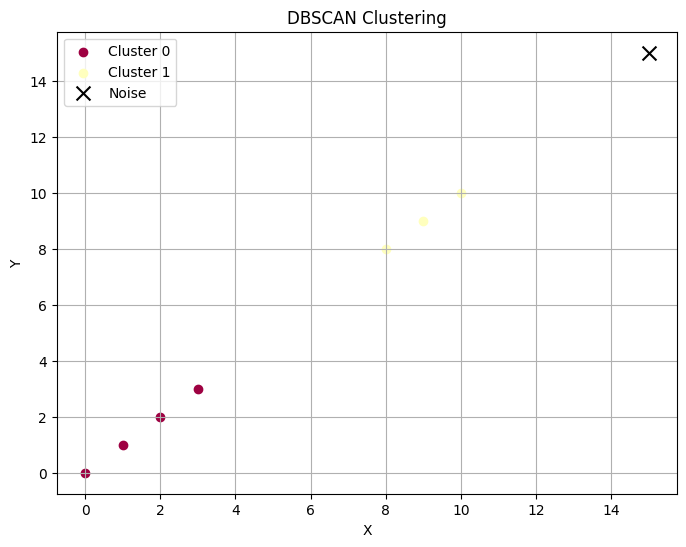

In [1]:
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# 1. Создаем данные
data = np.array([
    [0, 0], [1, 1], [2, 2], [8, 8], [9, 9], [10, 10], [3, 3], [15, 15]
])

# 2. Параметры DBSCAN
eps = 2  # Радиус окрестности
min_samples = 3  # Минимальное количество точек для ядра

# 3. Применяем DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(data)

# 4. Анализируем результаты
# Каждая метка кластера — это целое число (например, 0, 1, 2 и т.д.)
# Шумовые точки помечаются как -1
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)  # Исключаем шум (-1)

print(f"Количество кластеров: {n_clusters}")
print("Метки кластеров:", labels)

# 5. Визуализация результатов
plt.figure(figsize=(8, 6))

# Цветовая палитра для кластеров
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Шумовые точки (черный цвет)
        cluster_points = data[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c='black', marker='x', s=100, label="Noise")
    else:
        # Точки из кластера
        cluster_points = data[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=f"Cluster {label}")

# Настройка графика
plt.title("DBSCAN Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()